In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import tensorflow as tf  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
#Data Preparation
data = pd.read_csv('spam.csv',encoding='latin-1')

data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":'label', "v2":'text'})
#print(data.head())
tags = data["label"]
texts = data["text"]

In [3]:
#Classify label as 0 and 1
data['label'].unique()
label = {'spam': 1,'ham': 0}
data['label'].replace(label, inplace=True)

In [4]:

# Separate tags and texts into training and test sets
training_size = int(len(texts) * 0.8)

training_texts = texts[0:training_size]
testing_texts = texts[training_size:]
training_tags = tags[0:training_size]
testing_tags = tags[training_size:]

# Make labels into numpy arrays
training_tags_final = np.array(training_tags)
testing_tags_final = np.array(testing_tags)

In [5]:
#Tokenize Dataset 
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_texts)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_texts)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [14]:
#Modelling
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

35/35 [==============================] - 1s 21ms/step - loss: 0.6867 - accuracy: 0.8466
Accuracy: 84.66
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           16000     
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 15)                24015     
                                                                 
 dense_10 (Dense)            (None, 5)                 80        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 40,101
Trainable params: 40,101
Non-trainable params: 0
____________

In [15]:
num_epochs = 30
history=model.fit(padded, training_tags_final, epochs=num_epochs, validation_data=(testing_padded, testing_tags_final))
#Evaluate the model
_,accuracy = model.evaluate(testing_padded, testing_tags_final)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/30
140/140 [==============================] - 4s 24ms/step - loss: 0.3172 - accuracy: 0.8640 - val_loss: 0.1698 - val_accuracy: 0.8700
Epoch 2/30
140/140 [==============================] - 4s 30ms/step - loss: 0.1531 - accuracy: 0.9361 - val_loss: 0.1301 - val_accuracy: 0.9740
Epoch 3/30
140/140 [==============================] - 4s 26ms/step - loss: 0.0962 - accuracy: 0.9829 - val_loss: 0.0657 - val_accuracy: 0.9821
Epoch 4/30
140/140 [==============================] - 4s 27ms/step - loss: 0.0404 - accuracy: 0.9895 - val_loss: 0.0545 - val_accuracy: 0.9803
Epoch 5/30
140/140 [==============================] - 4s 27ms/step - loss: 0.0269 - accuracy: 0.9924 - val_loss: 0.0576 - val_accuracy: 0.9839
Epoch 6/30
140/140 [==============================] - 4s 30ms/step - loss: 0.0196 - accuracy: 0.9944 - val_loss: 0.0526 - val_accuracy: 0.9830
Epoch 7/30
140/140 [==============================] - 4s 28ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0561 - val_accuracy: 0.9821

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


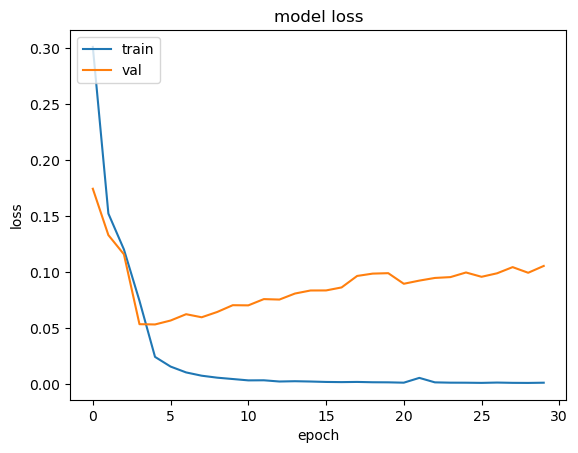

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
data = pd.read_csv('output_spam.csv',encoding='latin-1')

data = data.rename(columns={"ï»¿":'labels', "text":'texts'})
data.head()

,labels,texts
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...


In [17]:
messages = data['texts'] #.astype(str)
 #["How are you today", "You won 5000 pesos. Please click the link https://twitter.com/home"] 
# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(messages)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more likely that the message is spam
for x in range(len(messages)):
    print(messages[x])
    score = print(classes[x])
    print('\n')

1/1 [==============================] - 0s 64ms/step
Feel Yourself That You Are Always Happy.. Slowly It Becomes Your Habit &amp; Finally It Becomes Part Of Your Life.. Follow It.. Happy Morning &amp; Have A Happy Day:)
[2.2609434e-12]


staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
[0.00126462]


Send me yetty's number pls.
[8.227139e-06]


Hey so this sat are we going for the intro pilates only? Or the kickboxing too? 
[5.30556e-07]


I got it before the new year cos yetunde said she wanted to surprise you with it but when i didnt see money i returned it mid january before the  &lt;#&gt; day return period ended.
[6.924243e-10]


Hey we can go jazz power yoga hip hop kb and yogasana 
[3.533625e-07]


Hey mate. Spoke to the mag people. Weâ°ÃÃ·re on.  the is deliver by the end of the month. Deliver on the 24th sept. Talk later. 
[1.5868413e-07]


Morning only i can ok.
[2.080231e-08]


Wat time Ã_ finish?
[7.924379e-06]


Shant disturb u anymore... Jia you...
[2.7944829e-05]


4mt

In [18]:
results = model.evaluate(testing_padded, testing_tags_final, verbose=0)

print("    Test Loss: {:.4f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


    Test Loss: 0.1063
Test Accuracy: 98.48%
